In [243]:
# We have four files we'd like to use: 
# 1. Shapefile containing outline of the catchment area for the UK county Hereford
# 2. Shapefile containing outline of the river that runs through
import json
import pandas as pd
import numpy as np

In [3]:
# load data 2020 data
json_filepath1 = "/Users/sarasabzikari/Documents/Data Study/wye-hampton_bishop-conf_kerne_br/RPA_CropMapOfEngland2020HER_GeoJSON/data/Crop_Map_of_England_2020_Herefordshire.json"
with open(json_filepath1) as f:
    data_2020 = json.load(f)
    
json_filepath2 = "/Users/sarasabzikari/Downloads/wye-hampton_bishop-conf_kerne_br/RPA_CropMapOfEngland2021HER_GeoJSON/data/Crop_Map_of_England_2021_Herefordshire.json"
with open(json_filepath2) as f:
    data_2021 = json.load(f)

In [4]:
# explore the objects in json file
data_2020['features'][0]

{'type': 'Feature',
 'id': 1,
 'geometry': {'type': 'Polygon',
  'coordinates': [[[359226.31259999983, 234230.92200000025],
    [359246.31259999983, 234265.56259999983],
    [359226.31259999983, 234300.2031999994],
    [359186.31259999983, 234300.2031999994],
    [359166.31259999983, 234265.56259999983],
    [359186.31259999983, 234230.92200000025],
    [359226.31259999983, 234230.92200000025]]]},
 'properties': {'OBJECTID': 1,
  'prob': 0.134,
  'county': 'HER',
  'cromeid': 'RPA359206234265',
  'lucode': 'LG11',
  'shape_Length': 239.99855841003972,
  'shape_Area': 4156.871999949217}}

In [5]:
# save the data into dataframe - noramlise semi-structured JSON data into flat table
df_2020 = pd.json_normalize(data_2020['features'], max_level=1)
df_2020.head(2)

#df_2021 = pd.json_normalize(data_2021['features'], max_level=1)
#df_2021.head(2)

,type,id,geometry.type,geometry.coordinates,properties.OBJECTID,properties.prob,properties.county,properties.cromeid,properties.lucode,properties.shape_Length,properties.shape_Area
0,Feature,1,Polygon,"[[[359226.31259999983, 234230.92200000025], [3...",1,0.134,HER,RPA359206234265,LG11,239.998558,4156.872
1,Feature,2,Polygon,"[[[356846.31259999983, 220132.03119999915], [3...",2,0.262,HER,RPA356866220097,LG03,239.998558,4156.872


In [6]:
# explore the data types
df_2020.dtypes

type                        object
id                           int64
geometry.type               object
geometry.coordinates        object
properties.OBJECTID          int64
properties.prob            float64
properties.county           object
properties.cromeid          object
properties.lucode           object
properties.shape_Length    float64
properties.shape_Area      float64
dtype: object

In [124]:
# check data quality
print(len(df_2020['properties.county'].unique()))
print(len(df_2020['geometry.type'].unique()))
df_2020.isna().sum()

1
1


type                       0
id                         0
geometry.type              0
geometry.coordinates       0
properties.OBJECTID        0
properties.prob            0
properties.county          0
properties.cromeid         0
properties.lucode          0
properties.shape_Length    0
properties.shape_Area      0
dtype: int64

In [125]:
# check 'id' are unique - .isunique()
print(len(df_2020['id'].unique()))
df_2020['id'].count()

29269


29269

In [9]:
#number of entries per land use code
lucode = df_2020.groupby('properties.lucode').count()['id']
lucode 

properties.lucode
AC01    1297
AC03     461
AC15      17
AC16     119
AC17    2469
AC19     354
AC20       8
AC32     580
AC44    1755
AC63     363
AC65     273
AC66    5377
AC67    2026
AC68     116
FA01     365
HE02      25
HEAT     182
LG03    1227
LG07     227
LG11    1434
LG14      13
LG20    1591
NA01     721
PG01    3907
WA00       5
WO12    4357
Name: id, dtype: int64

In [138]:
# properties.prob informs us the probability of a crop growing in a particular region. 
# We will use a confidence interval of 80% 

df_80_ci = df_2020[df_2020['properties.prob']>=0.8]

In [139]:
#number of entries per land use code
lucode = df_80_ci.groupby('properties.lucode').count()['id']
lucode 

properties.lucode
AC01      94
AC03     124
AC17     225
AC32      13
AC44     648
AC63       3
AC65       6
AC66    1511
AC67    1040
LG03      17
LG07      30
NA01     179
PG01      12
WO12    1058
Name: id, dtype: int64

In [142]:
#importing and merging dataset describing the type of crops and corresponding land use coide
code_lookup = pd.read_csv('/Users/sarasabzikari/Documents/Data Study/wye-hampton_bishop-conf_kerne_br/CROME_LUCODE_LOOKUP.csv')

land_use = pd.merge(code_lookup, df_80_ci, left_on='LUCODE', right_on='properties.lucode')
land_use.head(5)


,Land Cover Description,LUCODE,Land Use Description,type,id,geometry.type,geometry.coordinates,properties.OBJECTID,properties.prob,properties.county,properties.cromeid,properties.lucode,properties.shape_Length,properties.shape_Area
0,Cereal Crops,AC01,Spring Barley,Feature,46,Polygon,"[[[358166.31259999983, 224635.35940000042], [3...",46,0.916,HER,RPA358186224600,AC01,239.998558,4156.872
1,Cereal Crops,AC01,Spring Barley,Feature,304,Polygon,"[[[354506.31259999983, 227787.7031999994], [35...",304,0.826,HER,RPA354526227753,AC01,239.998558,4156.872
2,Cereal Crops,AC01,Spring Barley,Feature,371,Polygon,"[[[357126.31259999983, 226575.26559999958], [3...",371,0.848,HER,RPA357166226575,AC01,239.998558,4156.872
3,Cereal Crops,AC01,Spring Barley,Feature,706,Polygon,"[[[357266.31259999983, 223145.79700000025], [3...",706,0.852,HER,RPA357286223111,AC01,239.998905,4156.884
4,Cereal Crops,AC01,Spring Barley,Feature,1568,Polygon,"[[[357206.31259999983, 222487.625], [357186.31...",1568,0.858,HER,RPA357226222452,AC01,239.998558,4156.872


<AxesSubplot:>

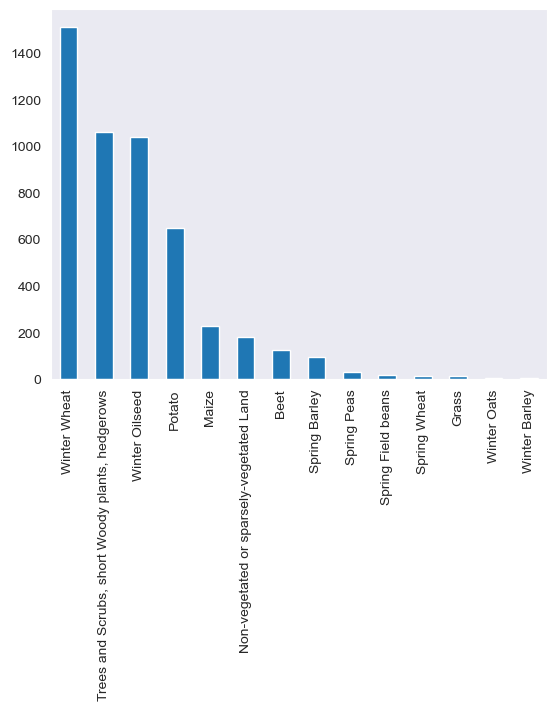

In [143]:
land_use['Land Use Description'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Land Use Description'>

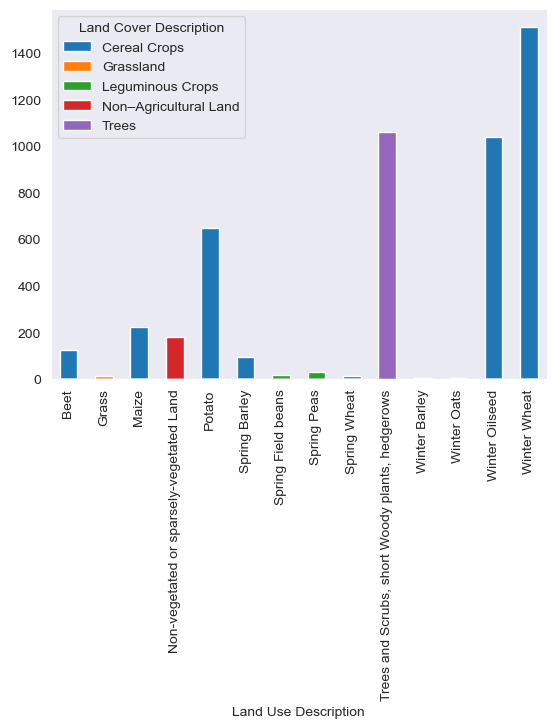

In [144]:
#visualising the coverage of land cover and types of crops
# could use help on how to sort categorical variables by frequency of observations plz
land_use.groupby(
    ['Land Use Description', 'Land Cover Description'])['Land Use Description'].count().unstack(
    'Land Cover Description').plot(
    kind='bar', stacked=True)

In [149]:
# number of regions in data that we are confident grew winter wheat
print((land_use['Land Use Description']=='Winter Wheat').sum(), 'regions grew winter wheat in 2020')

1511 regions grew winter wheat in 2020


## Using GeoPandas

In [152]:
# now using GeoPandas library to perform more
import geopandas as gpd

In [249]:
# read in original json file into GeoDataFrame and filter for 80% probability of land use description
df20 = gpd.read_file(json_filepath1)
df21 = gpd.read_file(json_filepath2)

df20 = df20[df20['prob']>0.8]
df21 = df21[df21['prob']>0.8]

df20.head()

,OBJECTID,prob,county,cromeid,lucode,shape_Length,shape_Area,geometry
4,5,0.862,HER,RPA361606230247,WO12,239.998558,4156.872,"POLYGON ((361626.313 230212.563, 361646.313 23..."
6,7,0.958,HER,RPA357406233157,AC66,240.025926,4157.820,"POLYGON ((357426.313 233122.406, 357446.313 23..."
11,12,0.870,HER,RPA354166233226,WO12,239.998558,4156.872,"POLYGON ((354206.313 233226.344, 354186.313 23..."
15,16,0.892,HER,RPA358126225466,AC67,239.998558,4156.872,"POLYGON ((358106.313 225501.391, 358086.313 22..."
27,28,0.936,HER,RPA357226231113,AC66,239.998558,4156.872,"POLYGON ((357246.313 231078.594, 357266.313 23..."


In [233]:
water_body = gdp.read_file('/Users/sarasabzikari/Documents/Data Study/wye-hampton_bishop-conf_kerne_br/WB_GB109055037112_shapefile/WFD_River_Water_Bodies_Cycle_3.shp')
catchment = gdp.read_file('/Users/sarasabzikari/Documents/Data Study/wye-hampton_bishop-conf_kerne_br/WB_GB109055037112_shapefile/WFD_River_Water_Body_Catchments_Cycle_3.shp')


<AxesSubplot:>

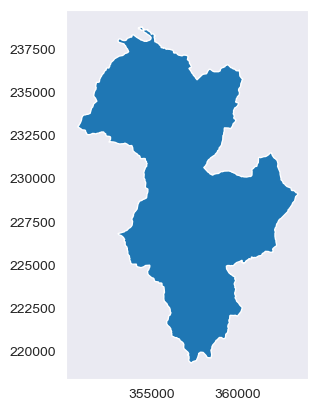

In [193]:
catchment.plot()

In [248]:
# merge GeoDataFrame and land use data frame, and reconstruct Geodf
geo_df20 = pd.merge(code_lookup, df20, left_on='LUCODE', right_on='lucode')
geo_data_2020 = gpd.GeoDataFrame(geo_df20)

geo_df21 = pd.merge(code_lookup, df21, left_on='LUCODE', right_on='lucode')
geo_data_2021 = gpd.GeoDataFrame(geo_df21)
geo_data_2021.head(5)

,Land Cover Description,LUCODE,Land Use Description,OBJECTID_1,refdate,objectid,prob,county,cromeid,lucode,shape_leng,shape_Length,shape_Area,geometry
0,Cereal Crops,AC01,Spring Barley,146,20220401,2419,0.848,HER,RPA357226223630,AC01,239.998905,239.998905,4156.884,"POLYGON ((357206.313 223665.422, 357186.313 22..."
1,Cereal Crops,AC01,Spring Barley,287,20220401,5047,0.922,HER,RPA352846235096,AC01,239.998558,239.998558,4156.872,"POLYGON ((352866.313 235062.313, 352886.313 23..."
2,Cereal Crops,AC01,Spring Barley,356,20220401,6474,0.820,HER,RPA361306229311,AC01,239.998905,239.998905,4156.884,"POLYGON ((361346.313 229311.906, 361326.313 22..."
3,Cereal Crops,AC01,Spring Barley,707,20220401,12473,0.820,HER,RPA357286223111,AC01,239.998905,239.998905,4156.884,"POLYGON ((357266.313 223145.797, 357246.313 22..."
4,Cereal Crops,AC01,Spring Barley,716,20220401,12711,0.918,HER,RPA355426226402,AC01,239.998558,239.998558,4156.872,"POLYGON ((355406.313 226436.703, 355386.313 22..."


In [232]:
from shapely.geometry import Point,Polygon
import descartes

<AxesSubplot:>

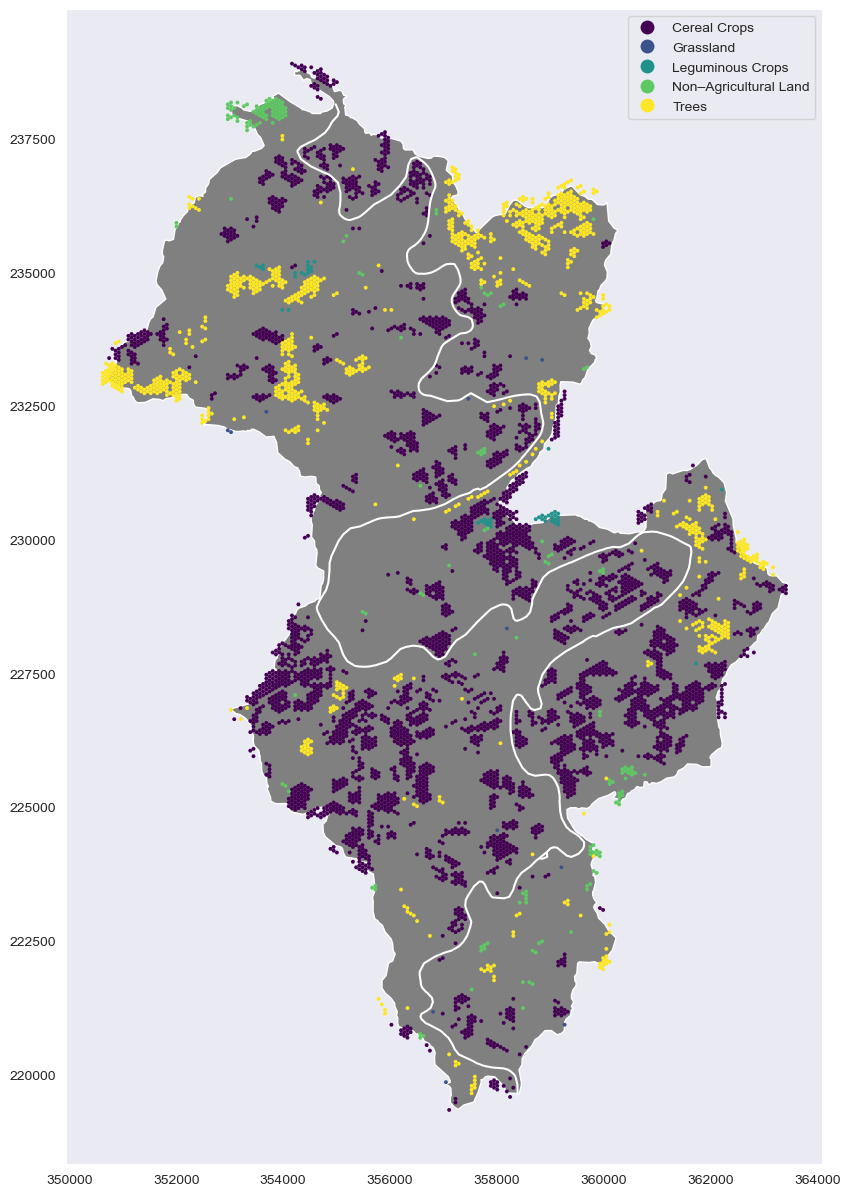

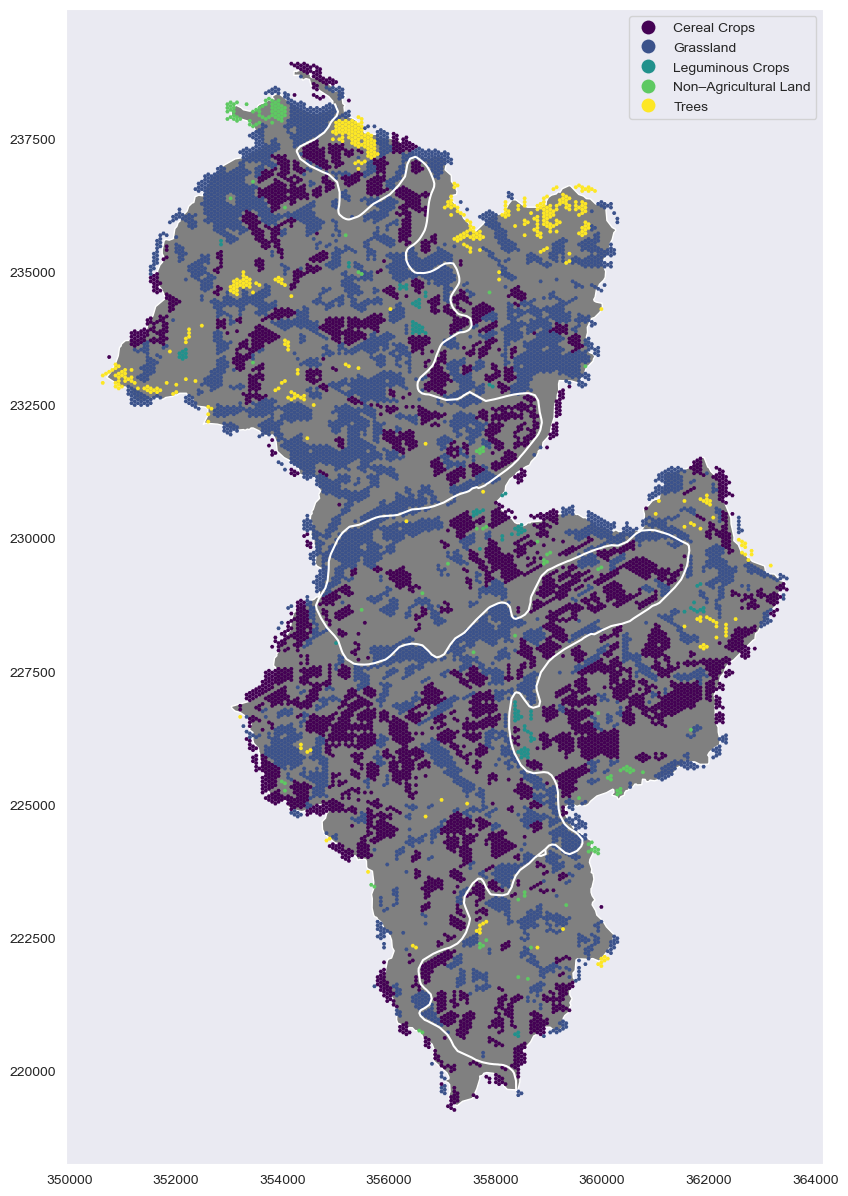

In [282]:
# initial visualisation: mapping out the regions in county, 2020 
# we have an additional land use variable in this dataset, water, that we don't want to use. So first, filter this out

fig, ax = plt.subplots(figsize = (15,15))
catchment.plot(ax=ax, color='gray')
water_body.plot(ax=ax, color='white')
geo_data_2020.plot(ax=ax, column='Land Cover Description', cmap='viridis',
                   edgecolor='none', legend=True)


fig, ax = plt.subplots(figsize = (15,15))
catchment.plot(ax=ax, color='gray')
water_body.plot(ax=ax, color='white')
geo_data_2021[geo_data_2021['Land Cover Description']!= 'Water'].plot(
    ax=ax, column='Land Cover Description', cmap='viridis', edgecolor='none'
,legend=True)